In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font family: Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family: Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding top:120px;}
div.text_cell_render ul li {font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font color = "red" size = "5">  ch05. 함수 </font></b>
- 사용할 코드를 묶어 놓고 그것에 이름을 붙힌 것
- 오버로딩(함수 이름이 같고, 매개변수의 타입이나 갯수로 다른 함수를 허용하는 것) 불가(자바, 파이썬은 불가)
- 함수 정의
```
def 함수명([매개변수1, .. 매개변수n]):
    명령어1
    명령어2
    명령어n
```

# 1절. 함수의 정의 및 사용
## 1.1 함수 정의

In [14]:
# 함수 정의
def my_message(x, msg): # msg를 x번 출력하는 함수
    for i in range(x):
        print(msg)

In [17]:
# 함수 사용
my_message(2, '안녕')

안녕
안녕


In [18]:
my_msg = my_message
my_msg(2, 'hihi :)')

hihi :)
hihi :)


In [19]:
print(type(my_msg), type(my_message))

<class 'function'> <class 'function'>


In [22]:
print('hello') # 파이썬 내장함수 (import 하지 않고 사용할 수 있는 함수)
print = 5
del print
print('hello')

hello
hello


In [23]:
my_message(2, 'hello')

hello
hello


In [29]:
my_message = 5

In [26]:
my_message(1, 3)

TypeError: 'int' object is not callable

In [30]:
del my_message # 내가 만든 함수나 import 함수는 del 해도 복귀되지 않아 사용 불가해짐
# 변수를 삭제해도 함수 사용 불가(파이썬 내장 함수가 아니라서)

In [4]:
# 함수 정의 : 4월 16일(수)
def my_hello():              #자바와 파이썬은 오버로딩이 안되므로 새로만든 def my_hello(cnt)로 바뀜
    print('Hello Python')
    print('Hello World')
def my_hello(cnt):
    for i in range(cnt):
        print('Hello Python')
        print('Hello World')        

In [5]:
# 함수사용 = 함수호출
my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


In [6]:
if __name__ == '__main__':
    my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


In [2]:
import ch05 # ch05모듈을 load

In [3]:
ch05.my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


In [4]:
from ch05 import my_hello # ch05 모듈 안에 my_hello만 load

In [5]:
my_hello(2)

Hello Python
Hello World
Hello Python
Hello World


## 1.2 docstring
- 함수의 설명서 ex) print() ()사이에서 shift + tab, tab / 함수이름.__doc__ 로 docstring만 따로 볼 수 있음

In [7]:
def my_function():
    '''
    함수의 첫라인에 독스트링을 포함할 수 있습니다
    독스트링은 함수의 설명서를 달아주는 역할
    주석보다 많은 기능(shift+tab으로 독스트링을 볼 수 있음)
    '''
    pass

In [10]:
my_function() # shift + tab 으로 해당 함수의 docstring 보기

In [11]:
print(my_function.__doc__) # .__doc__ 명령어로 해당 함수의 docstring 보기


    함수의 첫라인에 독스트링을 포함할 수 있습니다
    독스트링은 함수의 설명서를 달아주는 역할
    주석보다 많은 기능(shift+tab으로 독스트링을 볼 수 있음)
    


In [12]:
def fibonacci(n):
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a + b
    print() # 개행

In [16]:
fibonacci(10) # 함수 안에 정의 되어 있는 변수는 호출이 불가함. ex ) a, b 호출시 오류

0 1 1 2 3 5 8 


## 1.3 지역변수(Local Variable)와 전역변수 (Global Variable)

In [18]:
global_var = 100 # 전역변수
def func1():
    print('함수 안에서 실행 :', global_var)
func1()
print('함수 밖에서 실행 :', global_var)

함수안 : 100
함수밖 : 100


In [21]:
def func2():
    local_var = 200 # 지역변수
    print('함수 안에서 실행 :', local_var)
func2()
print('함수 밖에서 실행 :', local_var)

함수안 : 200


NameError: name 'local_var' is not defined

In [24]:
g_var = 100 # 전역변수
def func3():
    g_var = 200 # 지역변수 (변수 선언과 할당)
    print('함수 안에서 실행(지역변수 g_var) :', g_var)
func3()
print('함수 밖에서 실행(전역변수 g_var) :', g_var)

함수 안에서 실행(지역변수 g_var) : 200
함수 밖에서 실행(전역변수 g_var) : 100


In [25]:
# 렉시컬 특성
g_var = 100 # 전역변수
def func4():
    print('함수 안에서 g_var 실행 :', g_var)
    g_var = 200 # 지역변수
func4()

UnboundLocalError: local variable 'g_var' referenced before assignment

In [32]:
# 렉시컬 특성 (Lexical 특성)
g_var = 100 # 전역변수
def func4():
    global g_var # func4() 함수내의 g_var는 전역 변수를 쓴다
    print('함수 안에서 g_var 실행 :', g_var)
    g_var = 200 # 전역변수로 변한 이유는 global 명령어를 함수내에서 사용했기 때문
func4()
print('함수 밖에서 g_var 실행 :', g_var)

함수 안에서 g_var 실행 : 100
함수 밖에서 g_var 실행 : 200


##  1.4 값에 의한 호출
- 함수의 매개변수(인수,인자)로 전달되는 변수가 스칼라 변수(문자 숫자, 논리형)일 때 값이 전달된다

In [34]:
foo = 'a' # 전역변수
id(foo) # 번짓수, 주소 확인

2825650988848

In [45]:
def func1(f): # 매개변수 f는 지역변수
    print('Before :', f, ' id(f) :', id(f))
    f = f * 3
    print('After :', f, ' id(f) :', id(f))
func1(foo)

Before : a  id(f) : 2825650988848
After : aaa  id(f) : 2825771679536


In [51]:
print(foo, ' id(foo) :', id(foo))

a  id(foo) : 2825650988848


## 1.5 참조(주소)에 의한 호출
- 함수의 매개변수(인수,인자)로 전달되는 변수가 리스트, 튜플, 셋, 딕셔너리 객체일 경우

In [37]:
L = [1, 2, 3]
id(L) # 주소 호출

2825723988672

In [50]:
def func2(f): # 매개변수는 지역변수
    print('Before :', f, ' id(f) :', id(f))
    f.append(4)
    print('After :', f, ' id(f) :', id(f))
func2(L)

Before : [1, 2, 3, 4, 4, 4, 4, 4, 4, 4]  id(f) : 2825723988672
After : [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4]  id(f) : 2825723988672


In [52]:
print('L =',L, ' id(L) :', id(L))

L = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4]  id(L) : 2825723988672


# 2절. 함수의 실행결과를 반환하는 return

In [ ]:
def add(x, y):
    return x + y

In [ ]:
i = 2; j =3
add(i, j)

In [55]:
def fibonacci_print(n):
    '''
    매개변수로 들어온 n값 미만의 피보나치 수열을 출력
    ex. n=10이면 0 1 1 2 3 5 8을 출력
    '''
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a + b
    print() # 개행
    
def fibonacci_return(n):
    '''
    매개변수로 들어온 n값 미만의 피보나치 수열을 리스트로 return
    ex. n=10이면 [0 1 1 2 3 5 8]을 return
    '''
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a + b
    return result # 반드시 return은 한 개의 값만 리턴할 수 있음

In [54]:
x = fibonacci_print(100)
print(x)

0 1 1 2 3 5 8 13 21 34 55 89 
None


In [58]:
x = fibonacci_return(100)
print(x)
print(type(x))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]
<class 'list'>


## 여러개 값 return

In [59]:
def swap(a, b):
    '매개변수의 순서를 바꿔서 return'
    return b, a

In [60]:
x, y = 5, 10
print(f'함수 실행 전 x ={x}, y ={y}')
x, y = swap(x, y)
print(f'함수 실행 후 x ={x}, y ={y}')

함수 실행 전 x =5, y =10
함수 실행 후 x =10, y =5


# 3절. 함수의 매개변수 ★
## 3.1 기본값을 갖는 매개변수

In [63]:
def make_url(ip, port=80): # 순서 인수 > 기본값을 갖는 매개변수 ex. (port=80, ip)로 적을 경우 사용시 (, url) 이런식으로 해야함
    return "http://{}:{}".format(ip, port)

In [65]:
print(make_url('www.naver.com'))
print(make_url('localhost', 8090))
print(make_url(port=8090, ip='localhost'))

http://www.naver.com:80
http://localhost:8090
http://localhost:8090


## 3.2 기본변수를 갖는 매개변수
- 기본변수가 스칼라 변수일 때
- 기본변수가 리스트, 셋, 딕셔너리 등의 객체일 때

In [4]:
i = 5
# 기본값을 갖는 변수가 스칼라 변수일 때 : arg의 기본값은 함수가 정의되는 시점의 값
def func2(arg=i):
    print('arg = ', arg)

In [5]:
i = 50
func2()

arg =  5


In [6]:
list_ = []
# 기본값을 갖는 변수가 객체(데이터구조)일 때 : arg의 기본값은 실행되는 시점으로 바뀜
def func3(data, L=list_):
    'data를 L에 append'
    L.append(data)
    return L

In [7]:
print(func3(10)) # list_가 수정 : [10]

[10]


In [10]:
list_ # call by referance 참조에 의한 변경

[10]

In [9]:
print(func3(20, [10]))

[10, 20]


In [11]:
def func4(data, L=None) :
    if L == None :
        L =[]
    L.append(data)
    return L

In [12]:
print(func4(10))
print(func4(10, list_))

[10]
[10, 10]


## 3.3 튜플 매개변수를 이용한 가변인수 설정

In [ ]:
# 파이썬은 오버로딩(함수의 중복)을 지원하지 않음
def add(a, b):
    return a + b
def add(a, b, c):
    return a + b + c

In [18]:
# *args : 매개변수들을 하나의 튜플 변수 args로 전달받음
def add(*args):
    '전달받은 매개변수들의 합을 return'
    result_tot = 0 # 누적변수
    for data in args:
        result_tot += data
    return result_tot

In [20]:
print(add(1))
print(add(1,2))
print(add(1,2,3,4,5,6,7,8,10))

1
3
46


In [21]:
subject = ('Python', 'Oracle', 'DL', 'ML')
'/'.join(subject)

'Python/Oracle/DL/ML'

In [23]:
def concat(*subject, sep):
    return sep.join(subject)

In [24]:
concat('Python', 'Oracle', 'DL', 'ML', '/')

'Python/Oracle/DL/ML//'

In [ ]:
# 해결책1 : 매개변수(파라미터) 이름을 지정해서 호출
concat('Python', 'Oracle', 'DL', 'ML', sep='/')

In [27]:
# 해결책2 : 기본값을 반드시 갖는 키워드인수 사용 ex. concat(*subject, sep='')
def concat(*subject, sep = '~'):
    return sep.join(subject)

In [26]:
concat('Python', 'Oracle', 'DL', 'ML', '/')

'Python~Oracle~DL~ML~/'

In [30]:
#해결책3 : sep을 순서 인수로 앞에 선언
def concat(sep, *subject):
    return sep.join(subject)

In [31]:
concat('/', 'Python', 'Oracle', 'DL', 'ML')

'Python/Oracle/DL/ML'

## 3.4 딕셔너리 매개변수
- 여러 개의 키워드 인수를 딕셔너리 형태로 받아서 가변키워드 인수로 처리
- *subject : * 한개를 변수 앞에 * 하나를 붙힐 경우 들어오는 여러개의 값을 튜플로 받음 or 튜플 해제
- `**`subject : ** 한개의 변수 앞에 ** 두개를 붙힐 경우 딕셔너리로 반환됨, or 딕셔너리해제
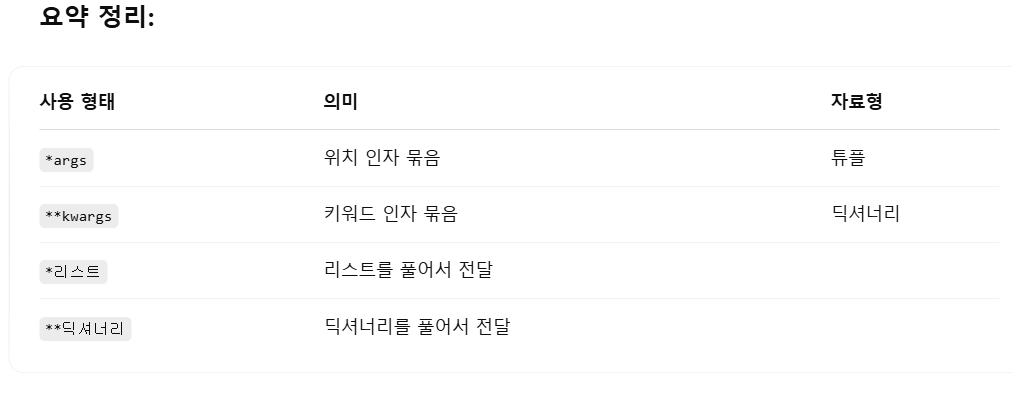

In [39]:
def func5(**kwags):
    print(kwags)
    print(type(kwags))
    print('이름 : ', kwags.get('name', '대마왕'))
    print('나이 : ', kwags.get('age', 30))
    print('주소 : ', kwags.get('adress', '서울'))

In [40]:
func5(name = '홍길동', age = 30, adress = '신림동')

{'name': '홍길동', 'age': 30, 'adress': '신림동'}
<class 'dict'>
이름 :  홍길동
나이 :  30
주소 :  신림동


## 3.5 함수정의시 매개변수 순서
- 순서인수 > 튜플매개변수(`*`) > 키워드인수(매개변수이름반드시명시) > 딕셔너리매개변수(`**`)

In [43]:
def func6(a, b, *c, **d):
    print('순서인수 a :', a)
    print('순서인수 b :', b)
    print('튜플인수 c :', c)
    print('딕셔너리 인수 d :', d)

In [44]:
func6(10, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, name='홍길동', age=30, address='서울')

순서인수 a : 10
순서인수 b : 20
튜플인수 c : (1, 2, 3, 4, 5, 6, 7, 8, 9)
딕셔너리 인수 d : {'name': '홍길동', 'age': 30, 'address': '서울'}


In [45]:
def func7(a, b, *c, d='기본값', **e):
    print('순서인수 a :', a)
    print('순서인수 b :', b)
    print('튜플인수 c :', c)
    print('키워드인수(기본값을 갖는 인수, 호출시 매개변수명 반드시 명시) d :', d)
    print('딕셔너리인수 e :', e)

In [46]:
func7(10, 20, 1, 2, 3, d='다른 것', fontsize=12, fontfamily='consola')

순서인수 a : 10
순서인수 b : 20
튜플인수 c : (1, 2, 3)
키워드인수(기본값을 갖는 인수, 호출시 매개변수명 반드시 명시) d : 다른 것
딕셔너리인수 e : {'fontsize': 12, 'fontfamily': 'consola'}


In [47]:
func7(10, 20, 1, 2, 3, '다른 것', fontsize=12, fontfamily='consola')

순서인수 a : 10
순서인수 b : 20
튜플인수 c : (1, 2, 3, '다른 것')
키워드인수(기본값을 갖는 인수, 호출시 매개변수명 반드시 명시) d : 기본값
딕셔너리인수 e : {'fontsize': 12, 'fontfamily': 'consola'}


## 3.6 인수(매개변수)의 언패킹
### 튜플인수 언패킹
- 튜플,리스트 언패킹 : 함수 호출시 매개변수 앞에 `*` 붙힘
- 튜플,리스트 패킹 : 함수 정의시 매개변수 앞에 `*` 붙힘

In [55]:
def add(*args):
    print(args)
    tot = 0
    for num in args:
        tot += num
    return tot

In [51]:
add(1, 2, 3, 4)

10

In [53]:
numbers = [1, 2, 3, 4]
add(*numbers) # 언패킹

10

In [54]:
numbers = (1, 2, 3, 4)
add(*numbers) # 언패킹

10

### 딕셔너리인수 언패킹
- 딕셔너리 언패킹 : 함수 호출시 매개변수 앞에 `**` 붙힘
- 딕셔너리 패킹 : 함수 정의시 매개변수 앞에 `**` 붙힘

In [56]:
def func5(**data):
    print(type(data))
    for key, item in data.items():
        print(f'{key}:{item}')

In [57]:
func5(name = '홍길동', age = 30, address = '신림')

<class 'dict'>
name:홍길동
age:30
address:신림


In [60]:
customInfo = {'name':'홍길동', 'age':30, 'address':'서울시 강남구', 'score':900}
func5(**customInfo)

<class 'dict'>
name:홍길동
age:30
address:서울시 강남구
score:900


# 4절. 람다식
- return 한줄짜리 작은 익명함수
## 4.1 람다식 연습

In [61]:
def add(a, b):
    return a+b
add(3, 4)

7

In [63]:
add2 = lambda a, b : a + b
add2(1, 2)

3

In [64]:
type(add), type(add2)

(function, function)

In [66]:
(lambda a, b : a + b)(3, 4) # 람다는 괄호로 묶어준 후 뒤에 변수 값을 대입하면 됨

7

In [2]:
# ex1. 매개변수로 들어온 값이 짝수인지 홀수인지 return
#def ex1(num):
#    if num % 2 :
#        result = "홀수"
#    else:
#        result = "짝수"
#    return result
#result = "홀수" if num%2 else "짝수"
#return "홀수" if num%2 else "짝수"

ex1 = lambda num : "홀수" if num%2 else "짝수"
ex1(10), ex1(-9)

('짝수', '홀수')

In [5]:
# ex2. 두 매개변수의 차이를 return
ex2 = lambda a, b: a-b if a > b else b-a
ex2(3, 2)

1

In [10]:
ex2 = lambda a, b : a-b if a>b else b-a
print(ex2(2, 1), ex2(10,20))
print(type(ex2))
# def diff(a, b):
# #     if a>b:
# #         result = a-b
# #     else:
# #         result = b-a
#      result = a-b if a>b else b-a
#      return result
# diff(2,1), diff(10, 20)

1 10
<class 'function'>


In [11]:
# ex3. 매개변수로 잔액을 받아 양수면 잔액을 return, 음수면 'negative'를 return
ex3 = lambda money : money if money >= 0 else 'negative'
ex3(1), ex3(-1)

(1, 'negative')

In [21]:
# ex4. 점수를 입력받아 점수가 80점이상은 A팀, 60점이상은 B팀, 60점미만은 재시험, 그 외는 유효하지 않음

ex4 = lambda score : "A팀" if 80<=score<=100 else \
                        "B팀" if 60<=score<80 else \
                        "재시험" if 0<=score<60 else \
                        "유효하지않음"

ex4(120), ex4(90), ex4(70), ex4(50)

('유효하지않음', 'A팀', 'B팀', '재시험')

In [4]:
# ex5. safe_index를 람다식으로 변환하여 작성
ex5 = lambda vector, data : vector.index(data) if data in vector else -1
ex5([1,2,3], 0), ex5([1,2,3], 3)

(-1, 2)

In [ ]:
def safe_index(vector, data):
    if data in vector: #lst 안에 data가 있으면 True, 없으면 False
        return vector.index(data) # 리스트 안에 data가 몇번째 인덱스인지 반환
    else:
        return -1 # 없으면 -1을 반환